In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)

In [2]:
labels = ['polx_1','polx_2','polx_3','polx_4','polx_5','polx_6','polx_7','polx_8',
          'poly_1','poly_2','poly_3','poly_4','poly_5','poly_6','poly_7','poly_8',
          'polz_1','polz_2','polz_3','polz_4']
SysFile = open('systematicsList.txt')
SysNames = SysFile.read().splitlines()
df = pd.read_csv('input/sysData.csv',index_col=False,names=labels)
df = pd.DataFrame(data=df.values, index=SysNames,columns=labels)
df.shape

(446, 20)

In [3]:
df.head()

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
Nominal,0.107685,0.155442,0.148061,0.128246,0.112778,0.102925,0.104590,0.140272,0.202263,0.144499,0.087845,0.065191,0.065806,0.088079,0.143958,0.202359,0.069699,0.233838,0.433847,0.262616
leptonSF_EL_SF_Reco_UP,0.107674,0.155429,0.148057,0.128245,0.112780,0.102931,0.104598,0.140288,0.202267,0.144494,0.087845,0.065193,0.065808,0.088079,0.143953,0.202361,0.069706,0.233859,0.433837,0.262597
leptonSF_EL_SF_Reco_DOWN,0.107696,0.155455,0.148066,0.128247,0.112775,0.102920,0.104583,0.140257,0.202258,0.144504,0.087845,0.065189,0.065804,0.088080,0.143963,0.202357,0.069694,0.233817,0.433857,0.262633
leptonSF_EL_SF_ID_UP,0.107660,0.155427,0.148060,0.128238,0.112775,0.102928,0.104598,0.140314,0.202257,0.144497,0.087849,0.065193,0.065812,0.088086,0.143954,0.202352,0.069644,0.233843,0.433822,0.262692
leptonSF_EL_SF_ID_DOWN,0.107710,0.155458,0.148063,0.128254,0.112779,0.102923,0.104582,0.140231,0.202269,0.144501,0.087840,0.065188,0.065801,0.088073,0.143963,0.202366,0.069754,0.233832,0.433874,0.262539


In [4]:
df_up = df[(df.index.str.contains('up') | df.index.str.contains('UP') | df.index.str.contains('Up'))]
df_down = df[df.index.str.contains('down') | df.index.str.contains('DOWN') | df.index.str.contains('Down')]
df_others = df[~df.index.str.contains('up') & ~df.index.str.contains('UP') & ~df.index.str.contains('Up') & ~df.index.str.contains('down') & ~df.index.str.contains('DOWN') & ~df.index.str.contains('Down')]
df_up.shape, df_down.shape,df_others.shape

((163, 20), (151, 20), (136, 20))

In [5]:
sysNamesUP = []
for index,row in df_up.iterrows():
    if ('down' not in index):
        if ('Pileup' not in index):
            a = index.replace('UP',"")
            a = a.replace('up',"")
            a = a.replace('Up',"")
            sysNamesUP.append(a)
        else:
            print(index)
            a = index.replace('1up',"")
            sysNamesUP.append(a)
    else:
        print(index)
        df_up = df_up.drop(index = index)

sysNamesDOWN = []
for index,row in df_down.iterrows():
    if ('up' not in index):
        a = index.replace('DOWN',"")
        a = a.replace('down',"")
        a = a.replace('Down',"")
        sysNamesDOWN.append(a)
    else:
        if ('Pileup' in index):
            sysNamesDOWN.append(index.replace('1down',""))
        else:
            print("Problem with: " + index)
for index,name in enumerate(sysNamesUP):
    if index > len(sysNamesDOWN)-1:
        print (name)
    else:
        if name != sysNamesDOWN[index]:
            print (name,sysNamesDOWN[index])
            
df_up = df_up.set_index([sysNamesUP])
df_down = df_down.set_index([sysNamesDOWN])
df_up.shape, df_down.shape

JET_CategoryReduction_JET_Pileup_OffsetMu__1down_Loose
JET_CategoryReduction_JET_Pileup_OffsetMu__1up_Loose
JET_CategoryReduction_JET_Pileup_OffsetNPV__1down_Loose
JET_CategoryReduction_JET_Pileup_OffsetNPV__1up_Loose
JET_CategoryReduction_JET_Pileup_PtTerm__1down_Loose
JET_CategoryReduction_JET_Pileup_PtTerm__1up_Loose
JET_CategoryReduction_JET_Pileup_RhoTopology__1down_Loose
JET_CategoryReduction_JET_Pileup_RhoTopology__1up_Loose
JET_CategoryReduction_JET_JER_DataVsMC_MC16__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_1__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_2__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_3__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_4__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_5__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_6__1_Loose
JET_CategoryReduction_JET_JER_EffectiveNP_7restTerm__1_Loose


((159, 20), (151, 20))

In [6]:
#Taking the last 8 Up variations elsewhere
df_up1side = df_up.tail(8)
df_up1side

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
JET_CategoryReduction_JET_JER_DataVsMC_MC16__1_Loose,0.106945,0.157210,0.148641,0.127391,0.112797,0.103842,0.103418,0.139756,0.202851,0.142462,0.087957,0.065709,0.066387,0.089225,0.144025,0.201383,0.072863,0.230711,0.432965,0.263462
JET_CategoryReduction_JET_JER_EffectiveNP_1__1_Loose,0.120896,0.158021,0.145683,0.128957,0.110378,0.100473,0.099357,0.136234,0.202227,0.141581,0.088205,0.067833,0.068988,0.090236,0.142262,0.198667,0.077585,0.232699,0.434179,0.255537
JET_CategoryReduction_JET_JER_EffectiveNP_2__1_Loose,0.111169,0.157731,0.147811,0.128543,0.112382,0.101996,0.101366,0.139002,0.202657,0.142779,0.087582,0.064442,0.067393,0.090150,0.144837,0.200160,0.075668,0.226255,0.434467,0.263611
JET_CategoryReduction_JET_JER_EffectiveNP_3__1_Loose,0.109728,0.158229,0.146862,0.130420,0.112700,0.100127,0.102455,0.139480,0.201429,0.142474,0.088396,0.065480,0.066697,0.089950,0.144234,0.201341,0.074360,0.228702,0.434023,0.262915
JET_CategoryReduction_JET_JER_EffectiveNP_4__1_Loose,0.110123,0.157882,0.147124,0.129786,0.110974,0.101620,0.103937,0.138554,0.204644,0.141470,0.086919,0.066122,0.065816,0.089159,0.145727,0.200144,0.072436,0.233231,0.434737,0.259596
JET_CategoryReduction_JET_JER_EffectiveNP_5__1_Loose,0.109232,0.158061,0.147474,0.130597,0.110028,0.102433,0.103003,0.139173,0.204235,0.141900,0.087609,0.065407,0.065871,0.089213,0.144715,0.201049,0.071483,0.230245,0.435212,0.263060
JET_CategoryReduction_JET_JER_EffectiveNP_6__1_Loose,0.108257,0.156152,0.148258,0.130122,0.111818,0.102472,0.103734,0.139187,0.204695,0.141755,0.087806,0.065206,0.064868,0.088225,0.145477,0.201968,0.071950,0.230630,0.437001,0.260419
JET_CategoryReduction_JET_JER_EffectiveNP_7restTerm__1_Loose,0.109281,0.157704,0.146901,0.130078,0.111200,0.102039,0.104183,0.138612,0.203837,0.142725,0.086341,0.066140,0.065575,0.089956,0.145340,0.200085,0.072880,0.229778,0.436261,0.261081


In [7]:
df_up = df_up.drop(df_up.tail(8).index)
df_up.head()

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
leptonSF_EL_SF_Reco_,0.107674,0.155429,0.148057,0.128245,0.112780,0.102931,0.104598,0.140288,0.202267,0.144494,0.087845,0.065193,0.065808,0.088079,0.143953,0.202361,0.069706,0.233859,0.433837,0.262597
leptonSF_EL_SF_ID_,0.107660,0.155427,0.148060,0.128238,0.112775,0.102928,0.104598,0.140314,0.202257,0.144497,0.087849,0.065193,0.065812,0.088086,0.143954,0.202352,0.069644,0.233843,0.433822,0.262692
leptonSF_EL_SF_Isol_,0.107678,0.155435,0.148059,0.128245,0.112778,0.102929,0.104595,0.140282,0.202264,0.144497,0.087845,0.065192,0.065808,0.088079,0.143956,0.202359,0.069702,0.233848,0.433840,0.262610
leptonSF_EL_SF_Trigger_,0.107682,0.155445,0.148063,0.128244,0.112776,0.102925,0.104588,0.140276,0.202256,0.144501,0.087848,0.065192,0.065809,0.088082,0.143960,0.202351,0.069684,0.233827,0.433830,0.262658
leptonSF_MU_SF_Isol_SYST_,0.107688,0.155455,0.148067,0.128249,0.112776,0.102919,0.104582,0.140264,0.202258,0.144505,0.087845,0.065190,0.065804,0.088080,0.143963,0.202354,0.069684,0.233803,0.433856,0.262657


In [11]:
#df_nominal = pd.DataFrame(data=df.loc['Nominal'],column=df.loc['Nominal'].index)\
df_nominal = pd.DataFrame()
df_nominal = df_nominal.append(df.iloc[0],ignore_index=True)
df_nominal

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
0,0.107674,0.155429,0.148057,0.128245,0.11278,0.102931,0.104598,0.140288,0.202267,0.144494,0.087845,0.065193,0.065808,0.088079,0.143953,0.202361,0.069706,0.233859,0.433837,0.262597


In [9]:
df_DeltaUP = df_up - df_nominal.iloc[0].values
df_DeltaDOWN = df_down - df_nominal.iloc[0].values

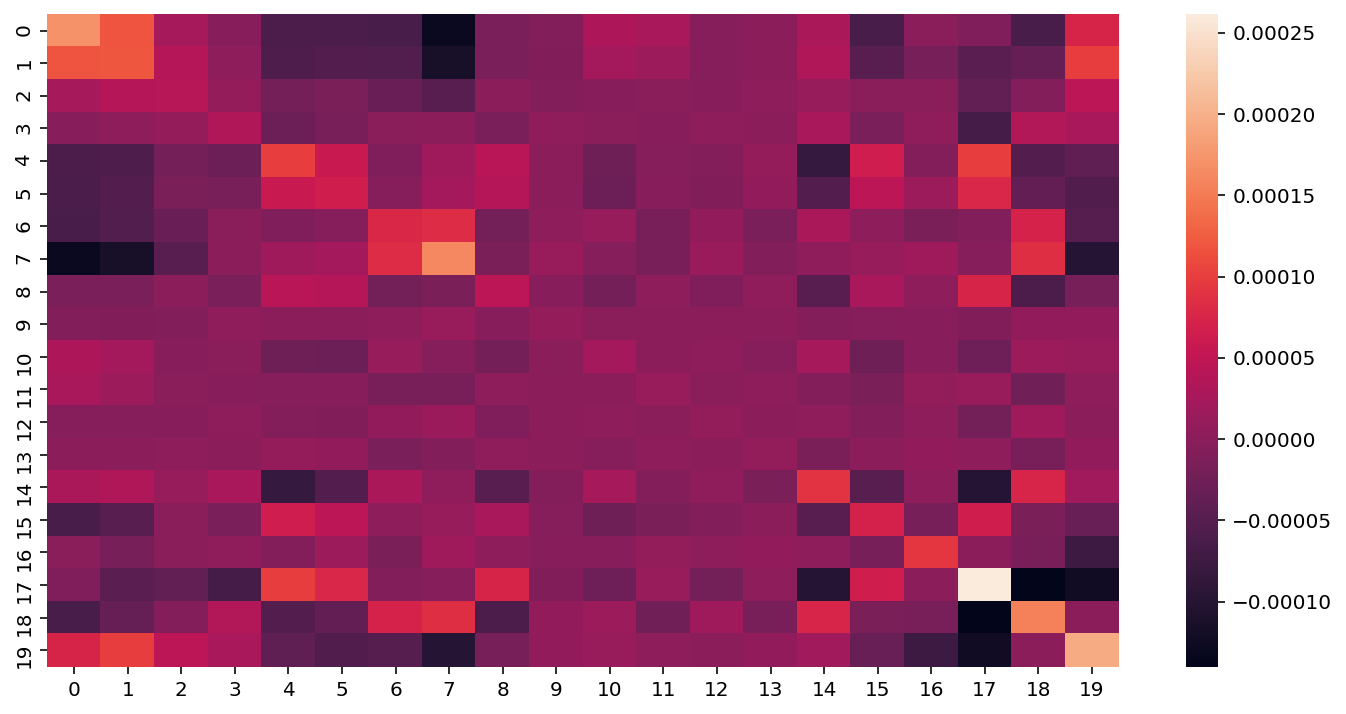

In [10]:
C = (df_DeltaUP.values.transpose().dot(df_DeltaUP.values) + df_DeltaDOWN.values.transpose().dot(df_DeltaDOWN.values))/2
heat_map = sns.heatmap(C)

In [11]:
pd.DataFrame(C,index = labels, columns = labels)

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
polx_1,1.708848e-04,0.000118,2.468087e-05,-2.852995e-06,-0.000060,-6.124026e-05,-0.000062,-0.000128,-1.546603e-05,-6.813174e-06,3.206139e-05,2.703688e-05,-4.965709e-06,2.322430e-06,0.000029,-0.000063,-7.318137e-07,-1.048166e-05,-0.000063,0.000074
polx_2,1.182134e-04,0.000120,3.722156e-05,3.657515e-06,-0.000058,-5.281786e-05,-0.000054,-0.000114,-1.514786e-05,-8.683347e-06,2.259462e-05,1.624141e-05,-3.891657e-06,1.562399e-06,0.000033,-0.000046,-1.884861e-05,-4.570551e-05,-0.000034,0.000099
polx_3,2.468087e-05,0.000037,4.067251e-05,9.756007e-06,-0.000020,-1.383144e-05,-0.000030,-0.000048,4.814183e-07,-7.923186e-06,-3.353858e-06,-4.525763e-07,-2.019436e-06,3.181347e-06,0.000012,-0.000002,-1.402845e-06,-3.882987e-05,-0.000006,0.000046
polx_4,-2.852995e-06,0.000004,9.756007e-06,3.507843e-05,-0.000029,-1.695799e-05,-0.000002,0.000002,-1.547178e-05,4.605515e-06,-1.714501e-06,-2.461761e-06,4.112322e-06,-3.092880e-07,0.000027,-0.000015,4.989450e-06,-6.776509e-05,0.000036,0.000027
polx_5,-5.982871e-05,-0.000058,-2.021745e-05,-2.876529e-05,0.000099,5.854681e-05,-0.000010,0.000019,4.273584e-05,2.220139e-06,-2.710867e-05,-4.388548e-06,-5.413162e-06,9.931507e-06,-0.000082,0.000064,-5.536230e-06,9.862964e-05,-0.000053,-0.000040
polx_6,-6.124026e-05,-0.000053,-1.383144e-05,-1.695799e-05,0.000059,6.620492e-05,-0.000004,0.000024,3.961724e-05,9.184103e-07,-2.924759e-05,-2.794896e-06,-8.275431e-06,6.056088e-06,-0.000052,0.000046,1.646798e-05,7.651807e-05,-0.000037,-0.000055
polx_7,-6.160617e-05,-0.000054,-3.032328e-05,-1.793939e-06,-0.000010,-4.317622e-06,0.000079,0.000084,-2.233090e-05,3.197881e-06,1.084603e-05,-1.675098e-05,6.437555e-06,-1.464267e-05,0.000030,0.000004,-1.393267e-05,-8.059622e-06,0.000072,-0.000050
polx_8,-1.282510e-04,-0.000114,-4.795888e-05,1.878213e-06,0.000019,2.441343e-05,0.000084,0.000161,-1.441792e-05,1.247780e-05,-4.077421e-06,-1.642954e-05,1.401553e-05,-8.101873e-06,0.000005,0.000012,1.899452e-05,-4.305789e-06,0.000085,-0.000100
poly_1,-1.546603e-05,-0.000015,4.814183e-07,-1.547178e-05,0.000043,3.961724e-05,-0.000022,-0.000014,4.630183e-05,-3.002084e-06,-1.971542e-05,2.864464e-06,-1.055009e-05,5.840580e-06,-0.000048,0.000027,3.191488e-06,7.403894e-05,-0.000059,-0.000018
poly_2,-6.813174e-06,-0.000009,-7.923186e-06,4.605515e-06,0.000002,9.184103e-07,0.000003,0.000012,-3.002084e-06,1.052330e-05,-7.023391e-07,1.912810e-06,1.628761e-06,-4.017069e-07,-0.000006,-0.000004,-3.039470e-06,-9.175720e-06,0.000006,0.000006


In [8]:
df = df.drop(df.head(1).index)

In [9]:
df

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
leptonSF_EL_SF_Reco_UP,0.107674,0.155429,0.148057,0.128245,0.112780,0.102931,0.104598,0.140288,0.202267,0.144494,0.087845,0.065193,0.065808,0.088079,0.143953,0.202361,0.069706,0.233859,0.433837,0.262597
leptonSF_EL_SF_Reco_DOWN,0.107696,0.155455,0.148066,0.128247,0.112775,0.102920,0.104583,0.140257,0.202258,0.144504,0.087845,0.065189,0.065804,0.088080,0.143963,0.202357,0.069694,0.233817,0.433857,0.262633
leptonSF_EL_SF_ID_UP,0.107660,0.155427,0.148060,0.128238,0.112775,0.102928,0.104598,0.140314,0.202257,0.144497,0.087849,0.065193,0.065812,0.088086,0.143954,0.202352,0.069644,0.233843,0.433822,0.262692
leptonSF_EL_SF_ID_DOWN,0.107710,0.155458,0.148063,0.128254,0.112779,0.102923,0.104582,0.140231,0.202269,0.144501,0.087840,0.065188,0.065801,0.088073,0.143963,0.202366,0.069754,0.233832,0.433874,0.262539
leptonSF_EL_SF_Isol_UP,0.107678,0.155435,0.148059,0.128245,0.112778,0.102929,0.104595,0.140282,0.202264,0.144497,0.087845,0.065192,0.065808,0.088079,0.143956,0.202359,0.069702,0.233848,0.433840,0.262610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JET_CategoryReduction_JET_JER_EffectiveNP_3__1up_Loose,0.109728,0.158229,0.146862,0.130420,0.112700,0.100127,0.102455,0.139480,0.201429,0.142474,0.088396,0.065480,0.066697,0.089950,0.144234,0.201341,0.074360,0.228702,0.434023,0.262915
JET_CategoryReduction_JET_JER_EffectiveNP_4__1up_Loose,0.110123,0.157882,0.147124,0.129786,0.110974,0.101620,0.103937,0.138554,0.204644,0.141470,0.086919,0.066122,0.065816,0.089159,0.145727,0.200144,0.072436,0.233231,0.434737,0.259596
JET_CategoryReduction_JET_JER_EffectiveNP_5__1up_Loose,0.109232,0.158061,0.147474,0.130597,0.110028,0.102433,0.103003,0.139173,0.204235,0.141900,0.087609,0.065407,0.065871,0.089213,0.144715,0.201049,0.071483,0.230245,0.435212,0.263060
JET_CategoryReduction_JET_JER_EffectiveNP_6__1up_Loose,0.108257,0.156152,0.148258,0.130122,0.111818,0.102472,0.103734,0.139187,0.204695,0.141755,0.087806,0.065206,0.064868,0.088225,0.145477,0.201968,0.071950,0.230630,0.437001,0.260419


In [13]:
df_Delta = df - df_nominal.iloc[0].values

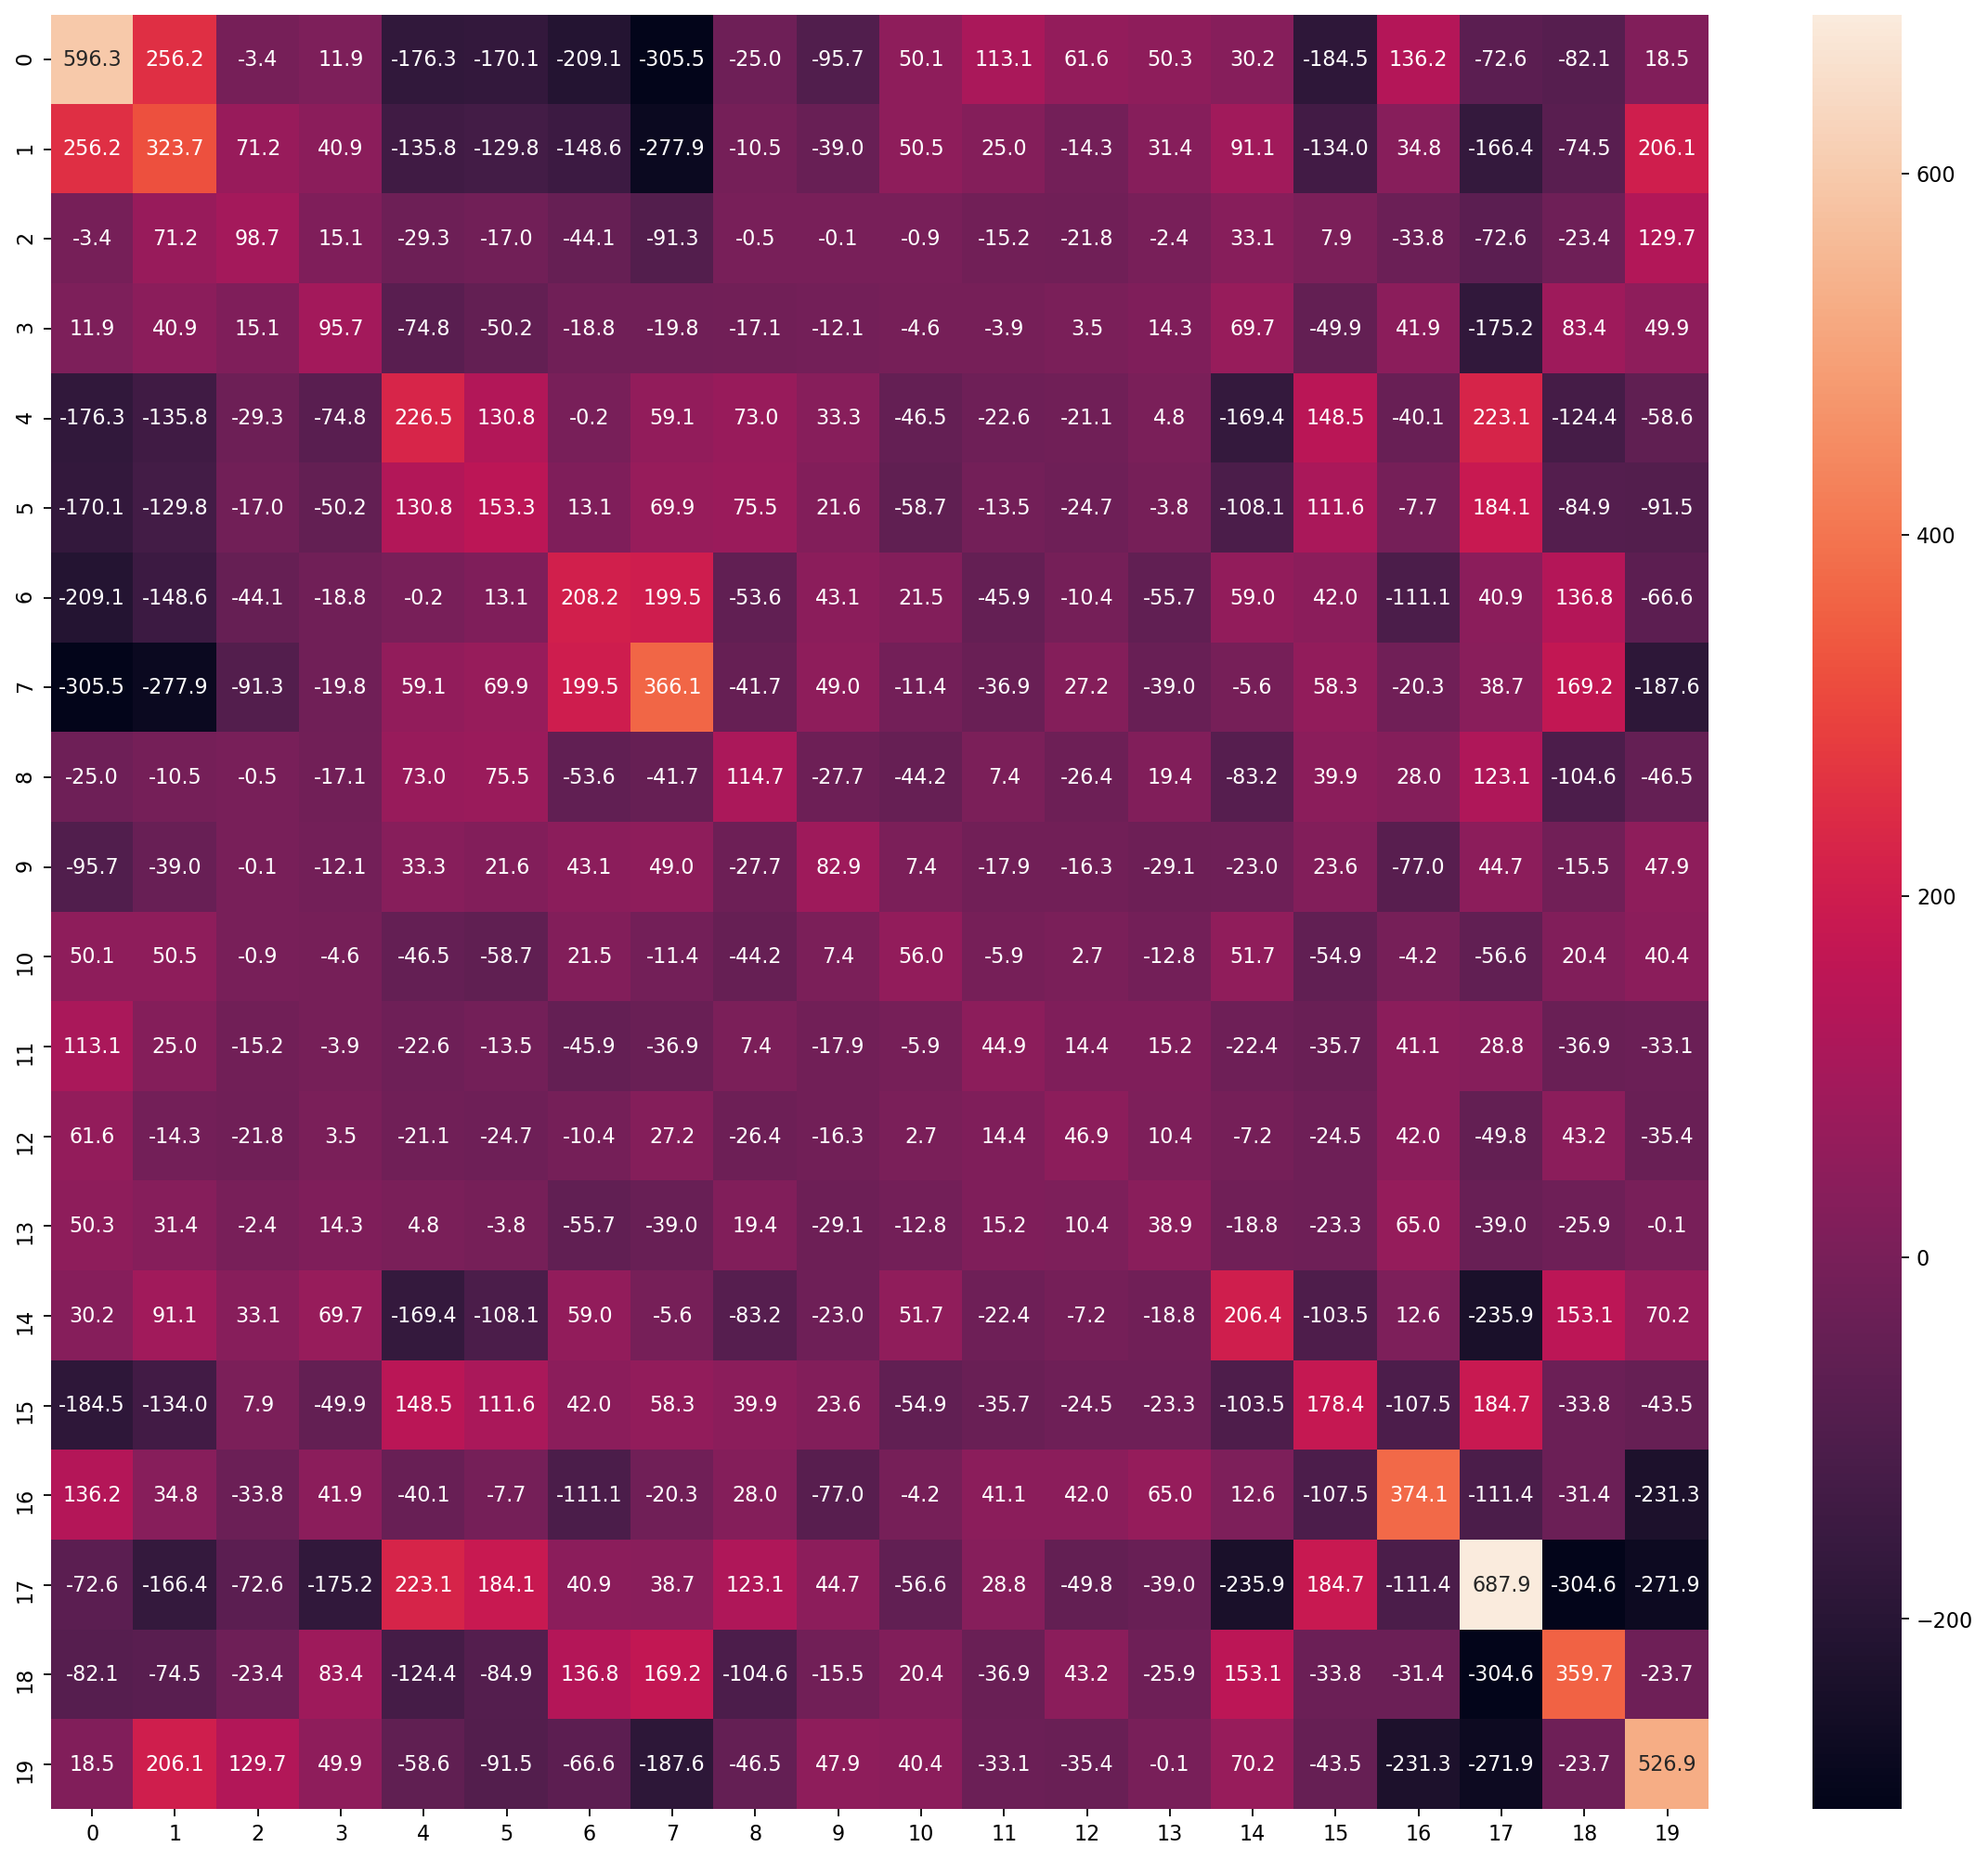

In [41]:
Covar = df_Delta.values.transpose().dot(df_Delta.values)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
covPlot = sns.heatmap(Covar*1e6, annot=True,fmt=".1f")
figure = covPlot.get_figure()
figure.savefig('Covariance_Inclusive.pdf')

In [18]:
pd.DataFrame(Covar,index = labels, columns = labels)

,polx_1,polx_2,polx_3,polx_4,polx_5,polx_6,polx_7,polx_8,poly_1,poly_2,poly_3,poly_4,poly_5,poly_6,poly_7,poly_8,polz_1,polz_2,polz_3,polz_4
polx_1,0.000596,0.000256,-3.355571e-06,0.000012,-1.762959e-04,-0.000170,-2.091213e-04,-0.000306,-2.504563e-05,-9.569720e-05,5.005204e-05,0.000113,0.000062,5.032929e-05,0.000030,-0.000185,0.000136,-0.000073,-0.000082,1.850051e-05
polx_2,0.000256,0.000324,7.121968e-05,0.000041,-1.357552e-04,-0.000130,-1.486118e-04,-0.000278,-1.053727e-05,-3.903747e-05,5.046509e-05,0.000025,-0.000014,3.141926e-05,0.000091,-0.000134,0.000035,-0.000166,-0.000075,2.060973e-04
polx_3,-0.000003,0.000071,9.872492e-05,0.000015,-2.930784e-05,-0.000017,-4.413189e-05,-0.000091,-4.753875e-07,-1.277719e-07,-8.983573e-07,-0.000015,-0.000022,-2.449921e-06,0.000033,0.000008,-0.000034,-0.000073,-0.000023,1.297362e-04
polx_4,0.000012,0.000041,1.510556e-05,0.000096,-7.482938e-05,-0.000050,-1.876499e-05,-0.000020,-1.712050e-05,-1.208506e-05,-4.573093e-06,-0.000004,0.000004,1.433403e-05,0.000070,-0.000050,0.000042,-0.000175,0.000083,4.990818e-05
polx_5,-0.000176,-0.000136,-2.930784e-05,-0.000075,2.264811e-04,0.000131,-1.768469e-07,0.000059,7.299872e-05,3.328729e-05,-4.654039e-05,-0.000023,-0.000021,4.840179e-06,-0.000169,0.000149,-0.000040,0.000223,-0.000124,-5.857881e-05
polx_6,-0.000170,-0.000130,-1.699822e-05,-0.000050,1.308210e-04,0.000153,1.309369e-05,0.000070,7.547326e-05,2.159456e-05,-5.867863e-05,-0.000013,-0.000025,-3.804347e-06,-0.000108,0.000112,-0.000008,0.000184,-0.000085,-9.148308e-05
polx_7,-0.000209,-0.000149,-4.413189e-05,-0.000019,-1.768469e-07,0.000013,2.082476e-04,0.000199,-5.359823e-05,4.306374e-05,2.152393e-05,-0.000046,-0.000010,-5.569341e-05,0.000059,0.000042,-0.000111,0.000041,0.000137,-6.661517e-05
polx_8,-0.000306,-0.000278,-9.125677e-05,-0.000020,5.906274e-05,0.000070,1.994653e-04,0.000366,-4.169491e-05,4.900163e-05,-1.135066e-05,-0.000037,0.000027,-3.897494e-05,-0.000006,0.000058,-0.000020,0.000039,0.000169,-1.875655e-04
poly_1,-0.000025,-0.000011,-4.753875e-07,-0.000017,7.299872e-05,0.000075,-5.359823e-05,-0.000042,1.146803e-04,-2.765516e-05,-4.417829e-05,0.000007,-0.000026,1.942499e-05,-0.000083,0.000040,0.000028,0.000123,-0.000105,-4.651587e-05
poly_2,-0.000096,-0.000039,-1.277719e-07,-0.000012,3.328729e-05,0.000022,4.306374e-05,0.000049,-2.765516e-05,8.290098e-05,7.418485e-06,-0.000018,-0.000016,-2.906839e-05,-0.000023,0.000024,-0.000077,0.000045,-0.000016,4.787187e-05
